In [93]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [94]:
df = pd.read_csv('/content/Algerian_forest_fires_cleaned.csv')

In [95]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Data Preprocessing

In [96]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [97]:
df.duplicated().sum()

0

In [98]:
df['year'].value_counts()

year
2012    243
Name: count, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [100]:
df['Classes'] = df['Classes'].apply(lambda x: 1 if x == 'fire' else 0)  # Binary encoding for Classes


In [101]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [102]:
df= df.drop('year', axis=1)

Standadization

In [109]:
X = df.drop(columns=['FWI'])
y = df['FWI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Separate features and target

# Features
numeric_features = X.columns.tolist()

# Standard Scaling for numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [104]:
X = X_scaled
y = df['FWI']


Feature Selection

In [105]:
from sklearn.feature_selection import SelectKBest, f_regression

# Select top K features
k = 10  # You can adjust this number
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X_scaled, y)

# Get the selected feature names
selected_features = [feature for feature, support in zip(numeric_features, selector.get_support()) if support]

print("Top K selected features:", selected_features)



Top K selected features: ['day', 'Temperature', 'RH', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'Region']


In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assume X_new and y are already defined

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
print('R2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

# Feature Importances from Random Forest
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# Sorting features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=selected_features)
feature_importances = feature_importances.sort_values(ascending=False)
print("\nFeature Importances:\n", feature_importances)

# Select top k features based on importance
k = 10  # You can adjust this value
top_k_features = feature_importances.head(k).index
print(f"Top {k} features based on importance:", top_k_features)


R2 Score: 0.9768261485557613
Mean Squared Error: 0.7023628571428555

Feature Importances:
 ISI            0.663576
FFMC           0.168840
DMC            0.114917
BUI            0.029903
DC             0.013773
RH             0.004113
day            0.002030
Temperature    0.001969
Region         0.000582
Rain           0.000295
dtype: float64
Top 10 features based on importance: Index(['ISI', 'FFMC', 'DMC', 'BUI', 'DC', 'RH', 'day', 'Temperature', 'Region',
       'Rain'],
      dtype='object')


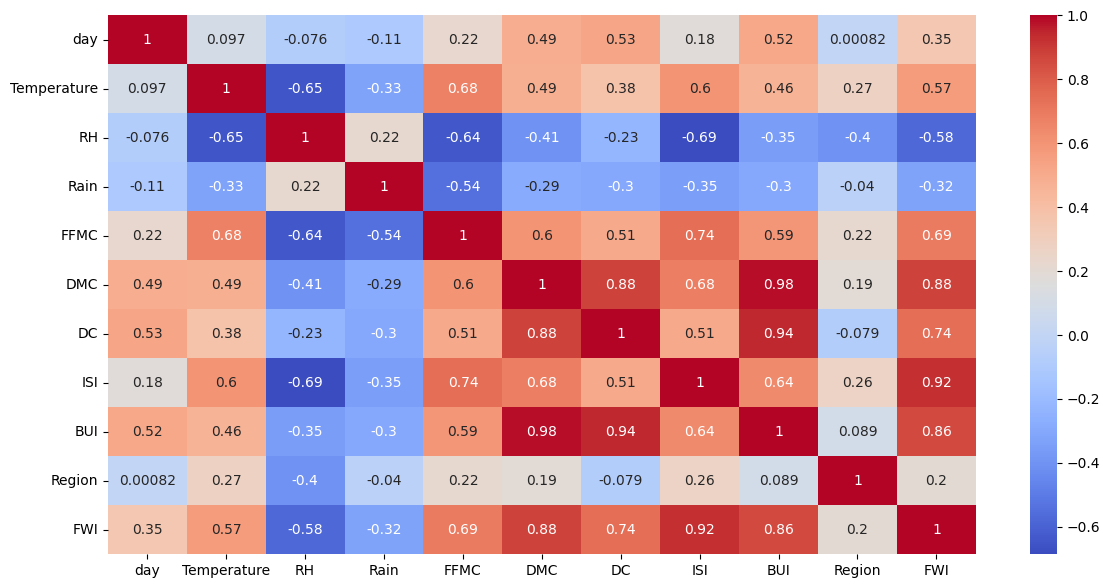

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for the selected features to visualize the correlation
selected_data = pd.DataFrame(X_new, columns=selected_features)
selected_data['FWI'] = y.reset_index(drop=True)

# Correlation matrix for selected features
corr_matrix = selected_data.corr()

plt.figure(figsize=(14, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Visaulaization

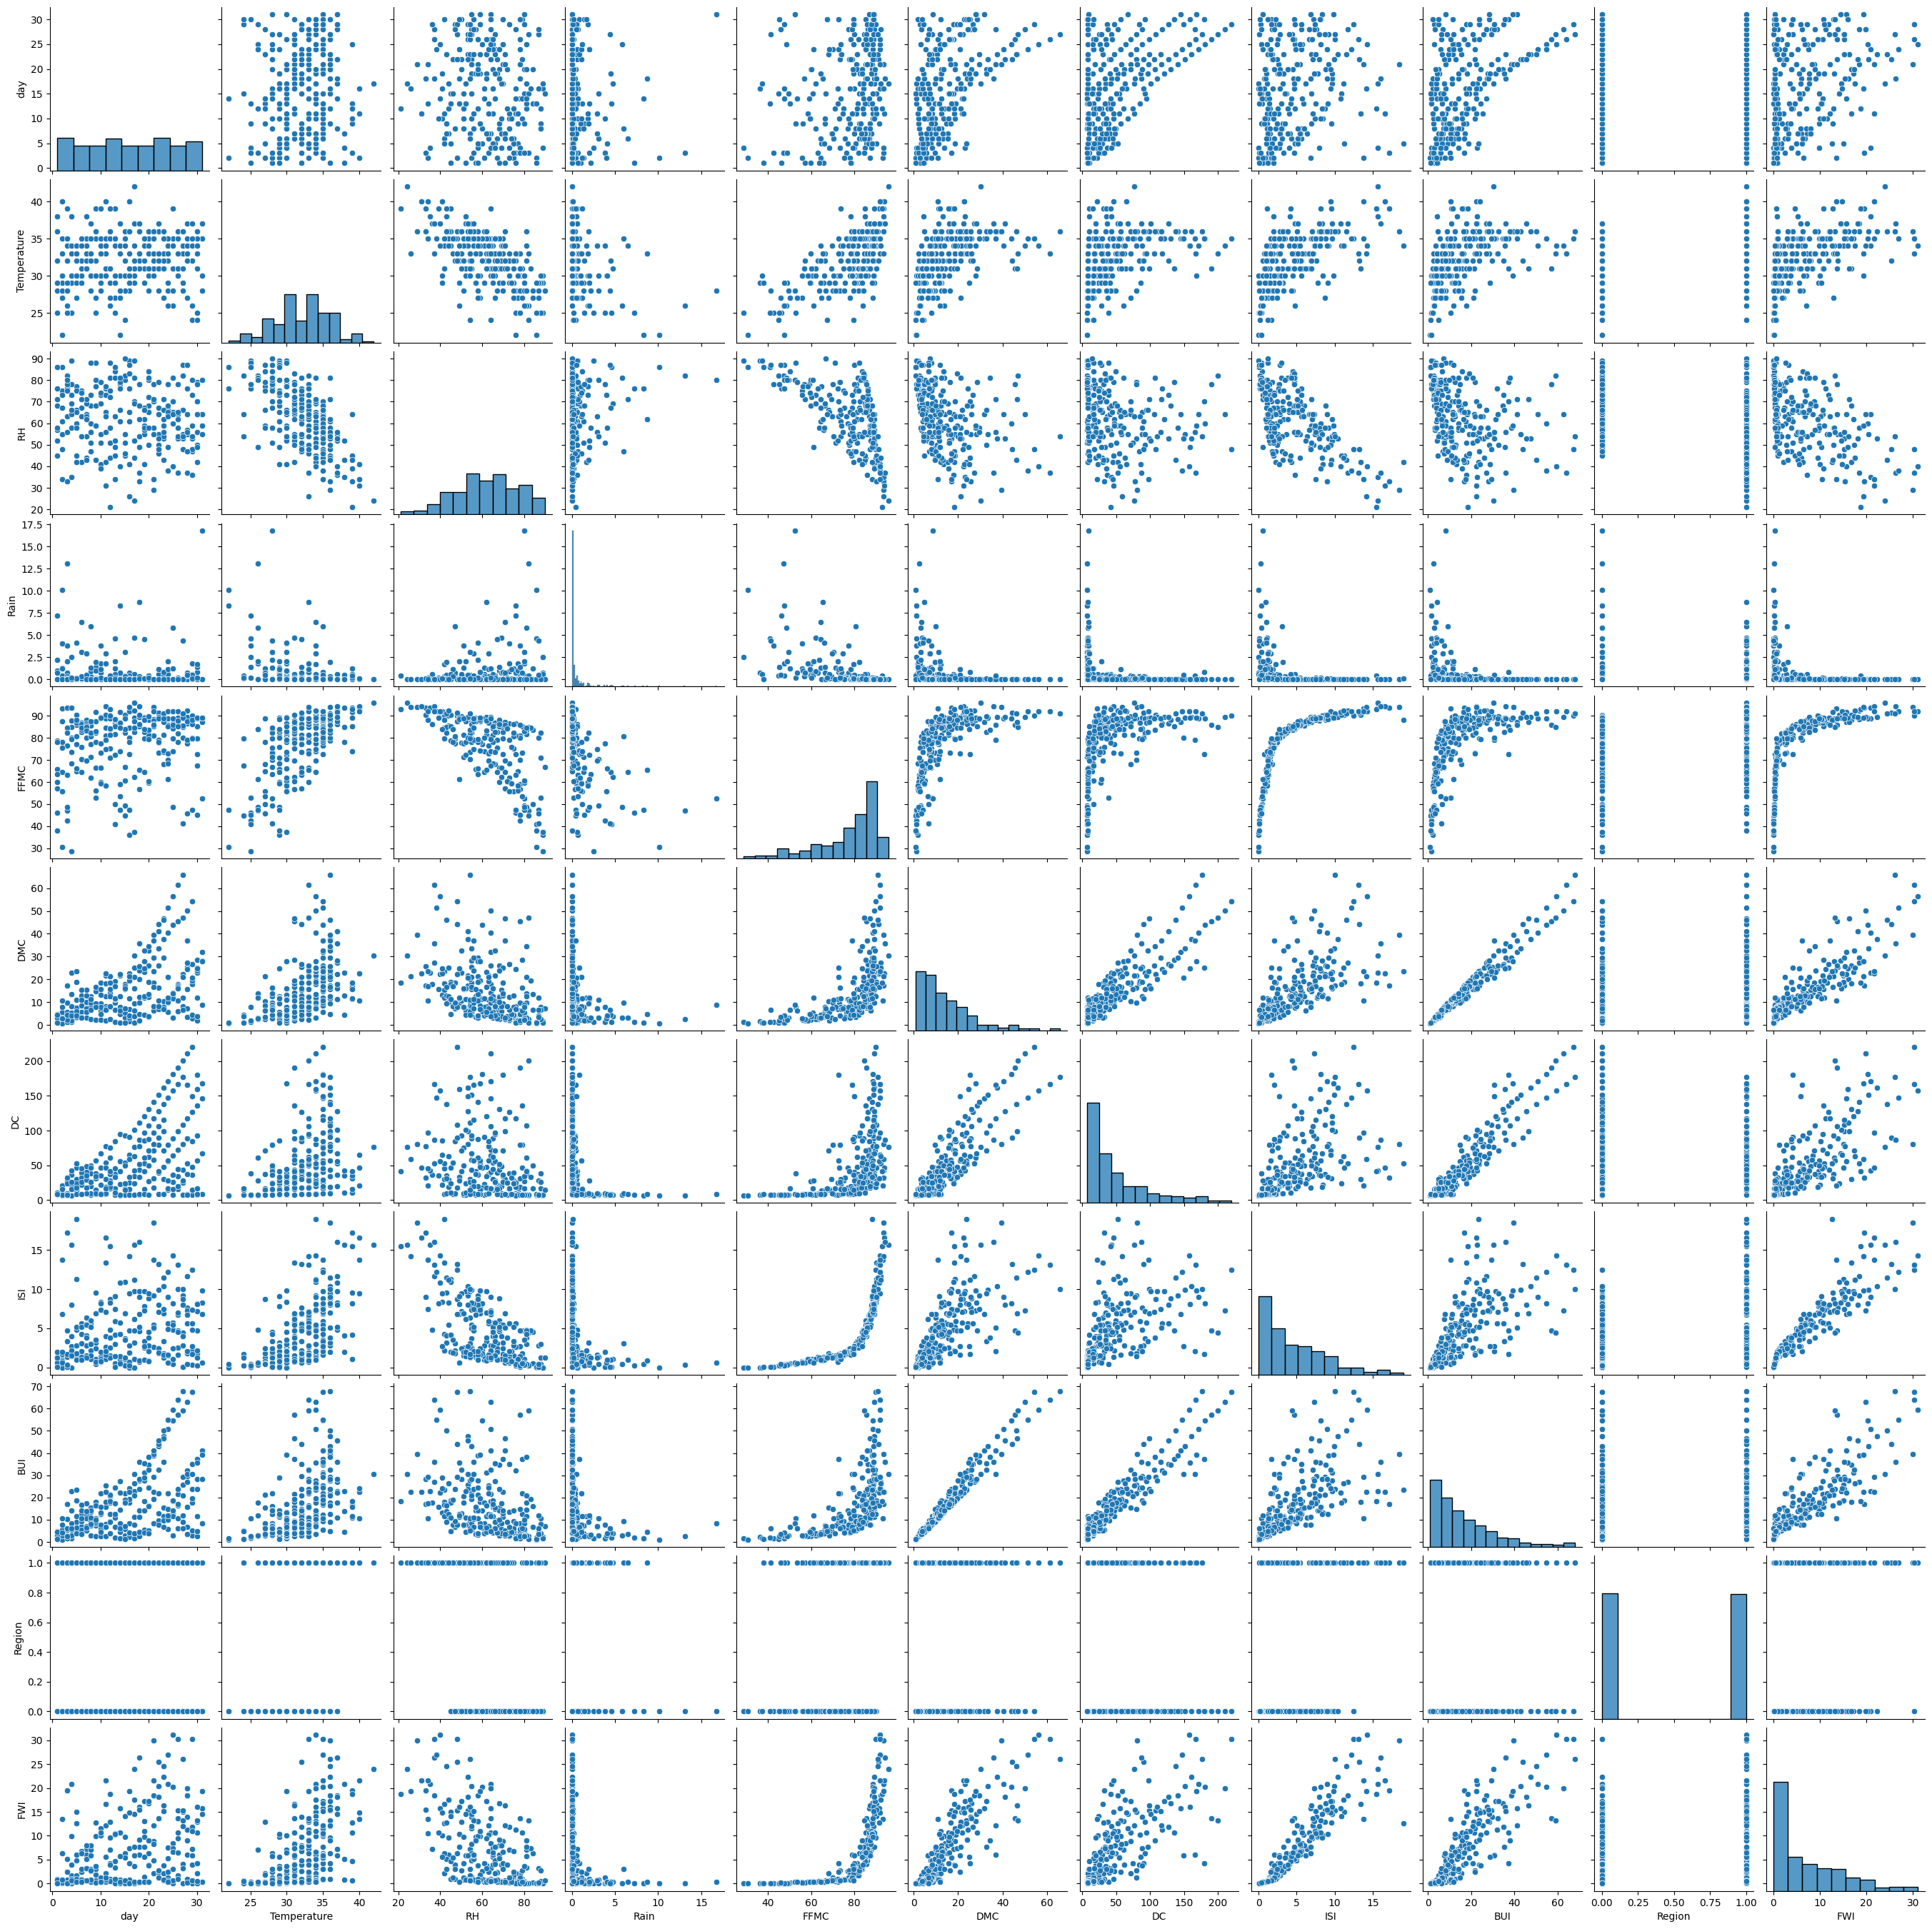

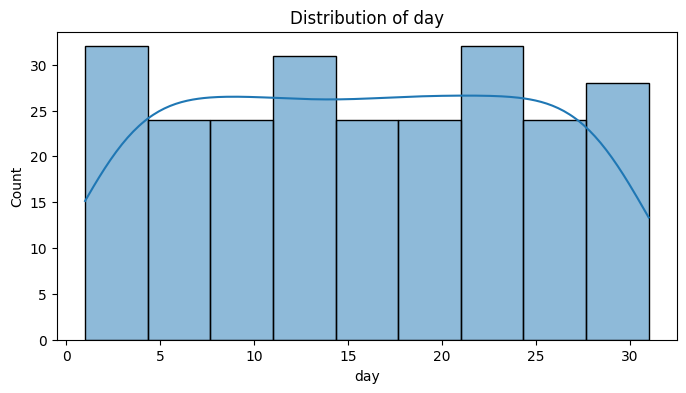

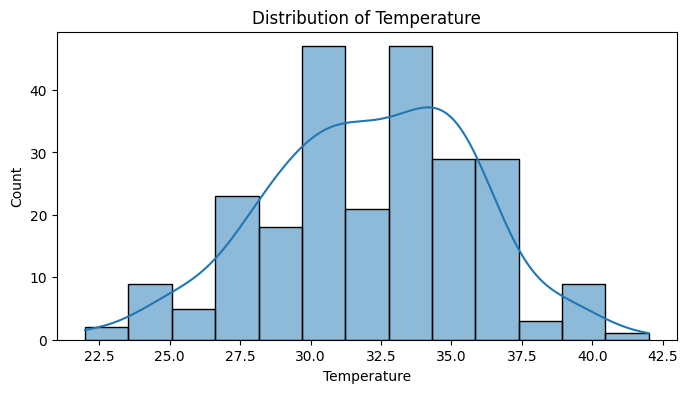

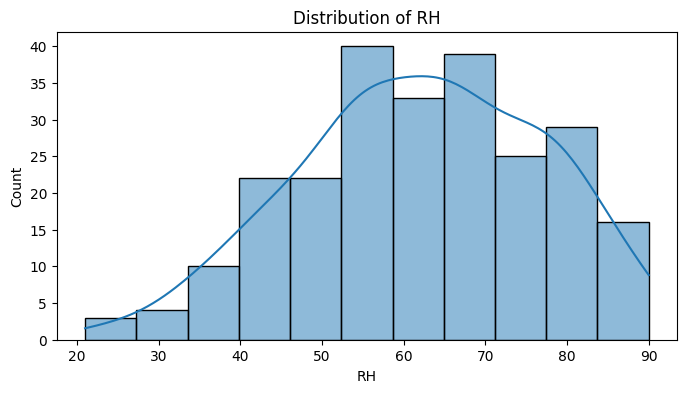

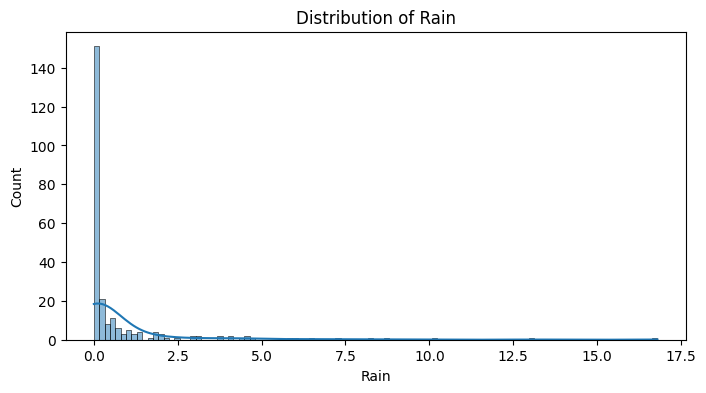

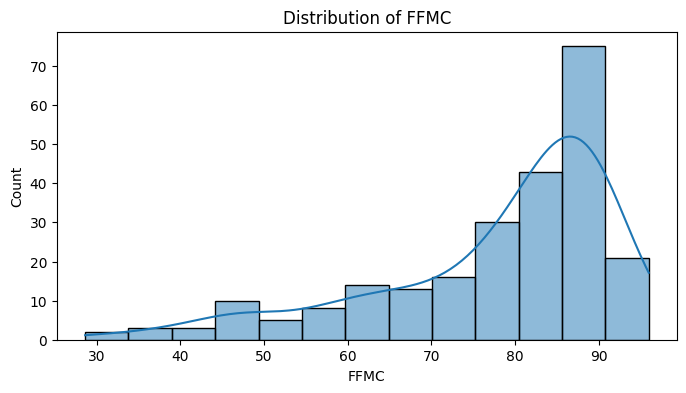

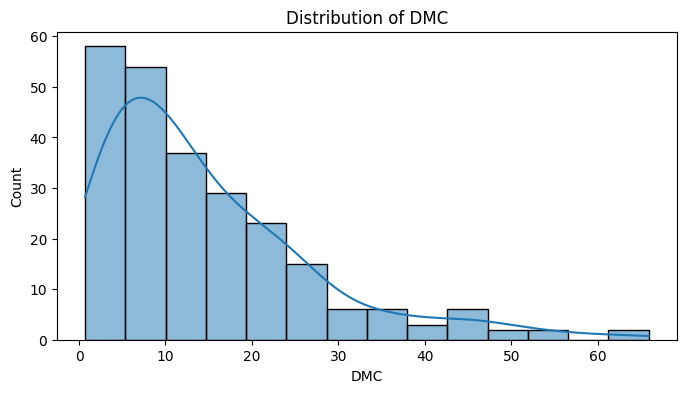

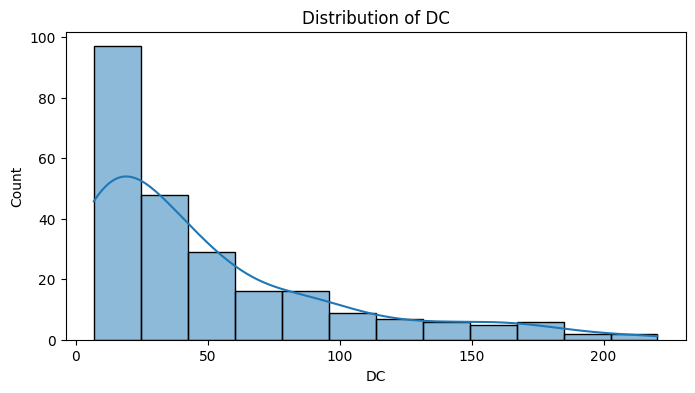

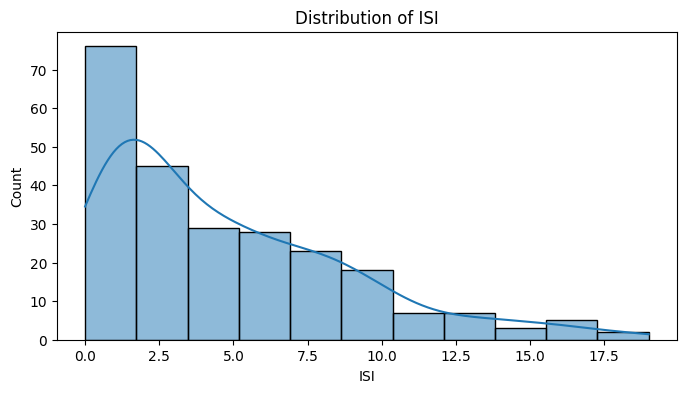

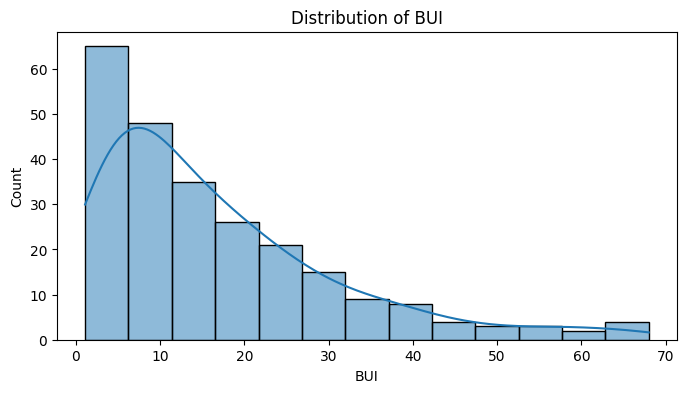

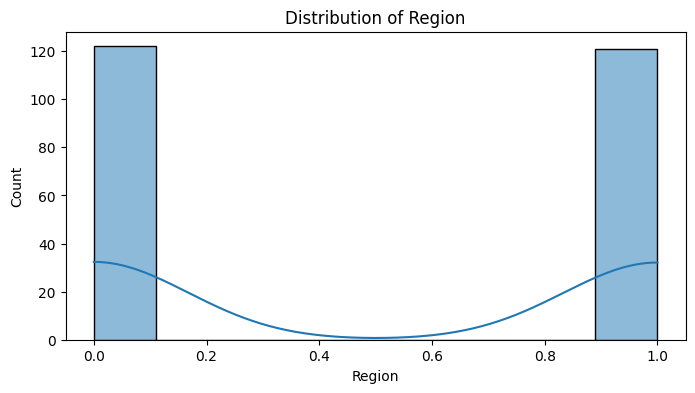

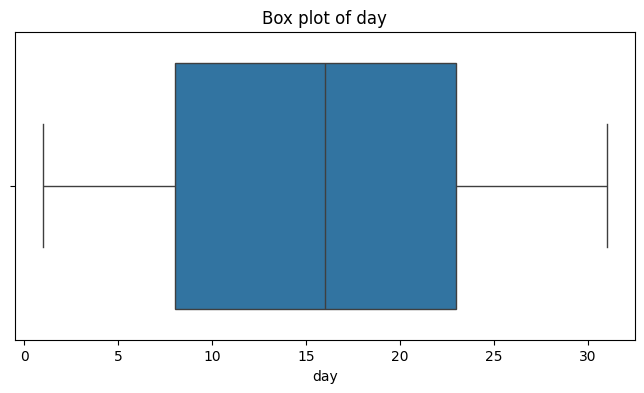

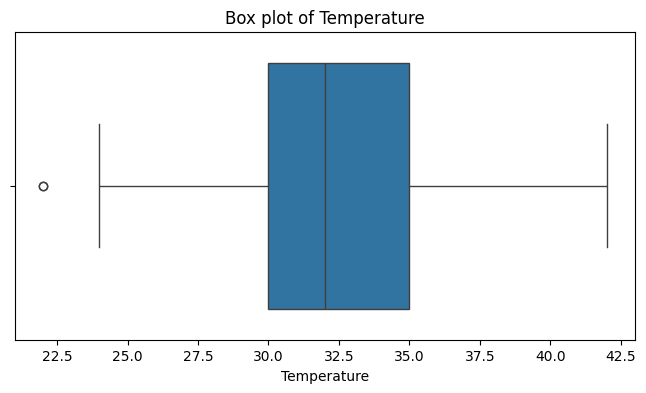

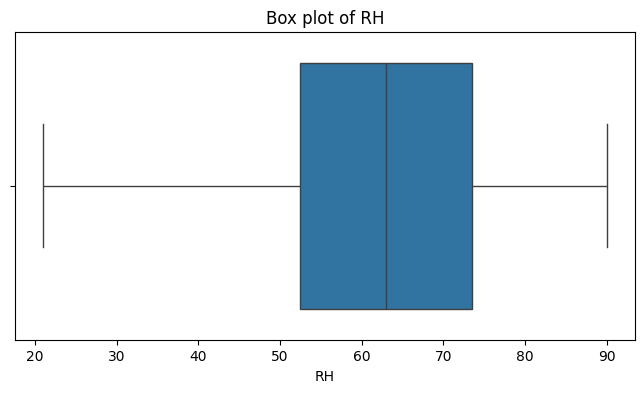

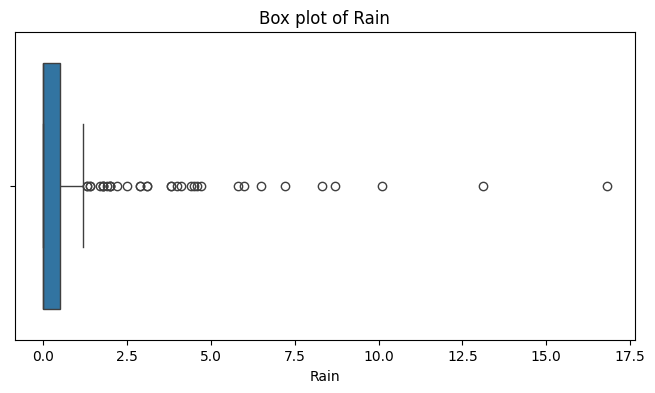

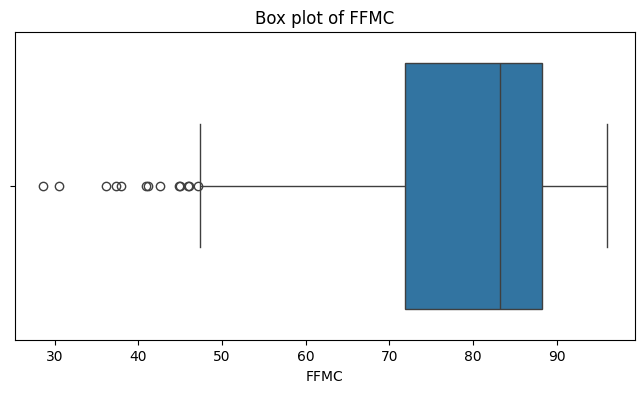

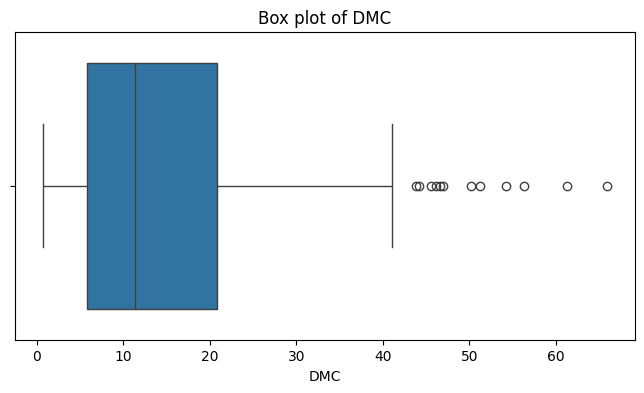

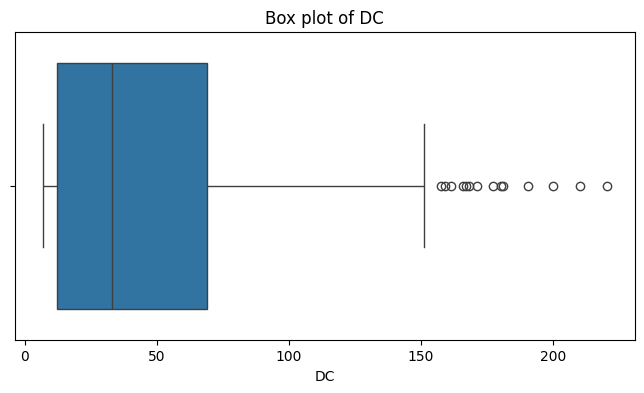

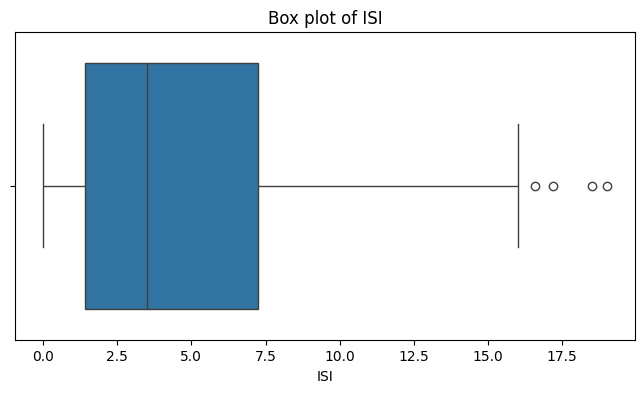

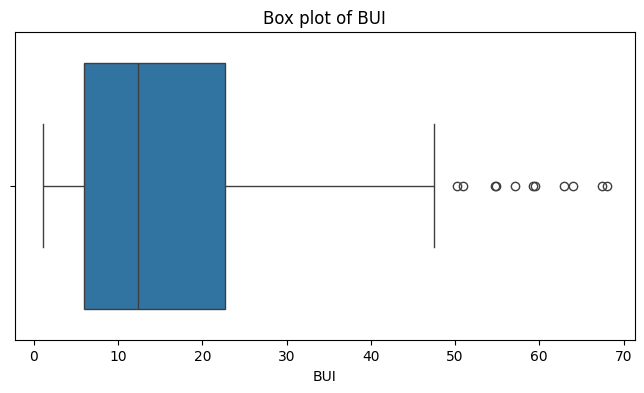

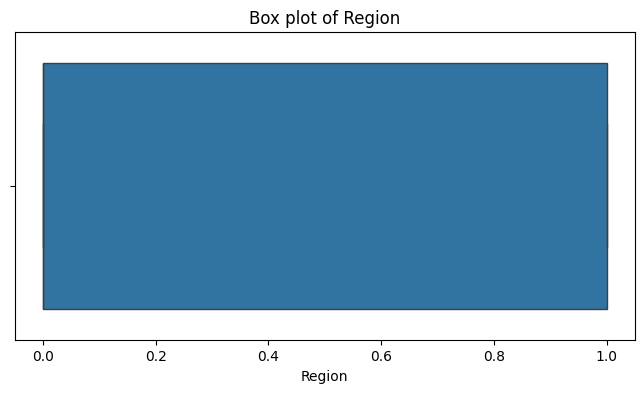

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot for selected features
sns.pairplot(df[selected_features + ['FWI']])
plt.show()

# Distribution plots for each feature
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Box plots for each feature to check for outliers
for feature in selected_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
    plt.show()




INSIGHTS

Fire Risk Indicators: The variables DMC, DC, ISI, FFMC, and BUI are closely interrelated and all positively correlate with the target variable and the Fire Weather Index (FWI), suggesting they are significant indicators of fire risk.
Environmental Factors: Temperature increases the fire risk, while higher relative humidity and rain reduce it.

Corealtion Analysis:
Temperature Positively correlated with fire-related indices (FFMC, DMC, ISI, and target variables), indicating that higher temperatures are associated with increased fire risk.
Relative Humidity (RH): Negatively correlated with fire-related indices, suggesting that higher humidity reduces fire risk.
Rain: Negatively correlated with fire-related indices, indicating that more rainfall reduces fire risk.

Models

In [110]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly_features, LinearRegression())
poly_model.fit(X_train, y_train)

# Ridge Regression
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)


ElasticNet(alpha=0.1)

CV and Hyper Parameter Tuning

In [111]:
from sklearn.model_selection import cross_val_score, GridSearchCV


lasso_cv_scores = cross_val_score(lasso_model, X_new, y, cv=5)
print('Lasso CV Scores:', lasso_cv_scores)

# Hyperparameter tuning for Lasso
param_grid_lasso = {'alpha': [0.1, 1.0, 10.0]}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
grid_search_lasso.fit(X_train, y_train)
print('Best parameters for Lasso:', grid_search_lasso.best_params_)

# Cross-validation for Ridge
ridge_cv_scores = cross_val_score(ridge_model, X, y, cv=5)
print('Ridge CV Scores:', ridge_cv_scores)

# Hyperparameter tuning for Ridge
param_grid = {'alpha': [0.1, 1.0, 10.0]}
grid_search_ridge = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search_ridge.fit(X_train, y_train)
print('Best parameters for Ridge:', grid_search_ridge.best_params_)

# Cross-validation for Elastic Net
elastic_net_cv_scores = cross_val_score(elastic_net_model, X, y, cv=5)
print('Elastic Net CV Scores:', elastic_net_cv_scores)

# Hyperparameter tuning for Elastic Net
param_grid_elastic = {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.2, 0.5, 0.8]}
grid_search_elastic = GridSearchCV(ElasticNet(), param_grid_elastic, cv=5)
grid_search_elastic.fit(X_train, y_train)
print('Best parameters for Elastic Net:', grid_search_elastic.best_params_)
best_lasso_model = grid_search_lasso.best_estimator_
best_ridge_model = grid_search_ridge.best_estimator_
best_elastic_net_model = grid_search_elastic.best_estimator_



Lasso CV Scores: [0.97890434 0.96720789 0.96866381 0.87500583 0.97568036]
Best parameters for Lasso: {'alpha': 0.1}
Ridge CV Scores: [0.98640378 0.96689975 0.96659459 0.85589656 0.97925554]
Best parameters for Ridge: {'alpha': 10.0}
Elastic Net CV Scores: [0.97094183 0.95940144 0.95922532 0.91316528 0.96859093]
Best parameters for Elastic Net: {'alpha': 0.1, 'l1_ratio': 0.5}


Model Evaluation

In [112]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluation function
def evaluate_model(y_test, y_pred):
    print('R2:', r2_score(y_test, y_pred))
    print('MSE:', mean_squared_error(y_test, y_pred))

# Evaluate all models
print('Linear Regression:')
y_pred_linear = linear_model.predict(X_test)
evaluate_model(y_test, y_pred_linear)

print('Polynomial Regression:')
y_pred_poly = poly_model.predict(X_test)
evaluate_model(y_test, y_pred_poly)

print('Ridge Regression:')
y_pred_ridge = ridge_model.predict(X_test)
evaluate_model(y_test, y_pred_ridge)

print('Lasso Regression:')
y_pred_lasso = lasso_model.predict(X_test)
evaluate_model(y_test, y_pred_lasso)

print('Elastic Regression:')
y_pred_elastic = lasso_model.predict(X_test)
evaluate_model(y_test, y_pred_elastic)


Linear Regression:
R2: 0.9894895883384667
MSE: 0.31855398668215046
Polynomial Regression:
R2: 0.7391985330217765
MSE: 7.904480786658957
Ridge Regression:
R2: 0.9838697389693007
MSE: 0.48888275007901716
Lasso Regression:
R2: 0.9824240298514602
MSE: 0.5326999113759769
Elastic Regression:
R2: 0.9824240298514602
MSE: 0.5326999113759769


Pickle

In [113]:
import pickle

# Save the best model
with open('best_ridge_model.pkl', 'wb') as f:
    pickle.dump(best_ridge_model, f)

# Load the model
with open('best_ridge_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
import pandas as pd

# unseen data
unseen_data = {
    'day': [33],
    'month': [6],
    'Temperature': [33],
    'RH': [54],
    'Ws': [13],
    'Rain': [0],
    'FFMC': [88.2],
    'DMC': [9.9],
    'DC': [30.5],
    'ISI': [6.4],
    'BUI': [10.9],
    'Classes': [1],
    'Region': [1]
}

# Create DataFrame
unseen_df = pd.DataFrame(unseen_data)

# Standard scaling
unseen_scaled = scaler.transform(unseen_df)

# Select top K features
unseen_selected = selector.transform(unseen_scaled)

# Predictions on unseen data
predictions = loaded_model.predict(unseen_selected)
print('Predictions on unseen data:', predictions)




Predictions on unseen data: [7.23761724]


In [115]:
# Save the best model
with open('best_elastic_model.pkl', 'wb') as f:
    pickle.dump(best_elastic_net_model, f)

# Load the model
with open('best_elastic_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
import pandas as pd

# unseen data
unseen_data = {
    'day': [33],
    'month': [6],
    'Temperature': [33],
    'RH': [54],
    'Ws': [13],
    'Rain': [0],
    'FFMC': [88.2],
    'DMC': [9.9],
    'DC': [30.5],
    'ISI': [6.4],
    'BUI': [10.9],
    'Classes': [1],
    'Region': [1]
}

# Create DataFrame
unseen_df = pd.DataFrame(unseen_data)

# Standard scaling
unseen_scaled = scaler.transform(unseen_df)

# Select top K features
unseen_selected = selector.transform(unseen_scaled)

# Predictions on unseen data
predictions = loaded_model.predict(unseen_selected)
print('Predictions on unseen data:', predictions)


Predictions on unseen data: [7.31041196]
